<a href="https://colab.research.google.com/github/HisakaKoji/test/blob/master/2-chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#@title 2.3 カウントベースの手法
import cupy as cp
x = cp.arange(6).reshape(2,3).astype('f')
x

array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)

In [5]:
x.sum(axis=1)

array([ 3., 12.], dtype=float32)

In [0]:
text = 'You say goodbye and I say hello.'

In [10]:
text = text.lower()
text = text.replace('.',' .')
text

'you say goodbye and i say hello .'

In [12]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [0]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [14]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [15]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [16]:
id_to_word[1]

'say'

In [17]:
word_to_id['hello']

5

In [18]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [0]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [21]:
!ls

sample_data


In [22]:
#@title 2.3.4 共起行列
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch-2.git

Cloning into 'deep-learning-from-scratch-2'...
remote: Enumerating objects: 344, done.
remote: Total 344 (delta 0), reused 0 (delta 0), pack-reused 344
Receiving objects: 100% (344/344), 7.65 MiB | 33.61 MiB/s, done.
Resolving deltas: 100% (189/189), done.


In [0]:
import sys
sys.path.append('deep-learning-from-scratch-2')
import numpy as np
from common.util import preprocess

In [0]:
text = 'You say goodbye and I say hello.'
corpus , word_to_id,id_to_word = preprocess(text)

In [25]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [26]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [0]:
def create_co_matrix(corpus,vocab_size,window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size,vocab_size),dtype=np.int32)
  
  for idx, word_id in enumerate(corpus):
    for i in range(1,window_size + 1):
      left_idx = idx - i
      right_idx = idx + i
      
      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id,left_word_id] += 1
        
      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id,right_word_id] += 1
  return co_matrix


In [0]:
#@title ベクトルの類似度

def cos_similarity(x,y):
  nx = x / np.sqrt(np.sum(x**2))
  ny = y / np.sqrt(np.sum(y**2))
  return np.dot(nx,ny)


In [0]:
def cos_similarity(x,y,eps=1e-8):
  nx = x / np.sqrt(np.sum(x**2)+eps)
  ny = y / np.sqrt(np.sum(y**2)+eps)
  return np.dot(nx,ny)

In [33]:
import sys 
sys.path.append('deep-learning-from-scratch-2')
from common.util import preprocess,create_co_matrix,cos_similarity

text = 'You say goodbye and I say hello.'

corpus, word_to_id ,id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0,c1))


0.7071067691154799


In [34]:
#@title 2.3.6 類似単語のランキング表示
# coding: utf-8
import sys
sys.path.append('deep-learning-from-scratch-2')
from common.util import preprocess, create_co_matrix, most_similar


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)



[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [35]:
#@title 2.4.1 相互情報量
# coding: utf-8
import sys
sys.path.append('deep-learning-from-scratch-2')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  # 有効桁３桁で表示
print('covariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [0]:
#@title 2.4.2　次元削減


[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


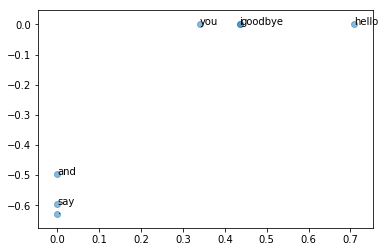

In [36]:
#@title 2.4.3 SVDによる次元削減


# coding: utf-8
import sys
sys.path.append('deep-learning-from-scratch-2')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

np.set_printoptions(precision=3)  # 有効桁３桁で表示
print(C[0])
print(W[0])
print(U[0])

# plot
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()


In [37]:
#@title 2.4.4　PTBデータセット



# coding: utf-8
import sys
sys.path.append('deep-learning-from-scratch-2')
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')

print('corpus size:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

Done
corpus size: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426
